# Determining the spread of disease using Monte Carlo Simulations

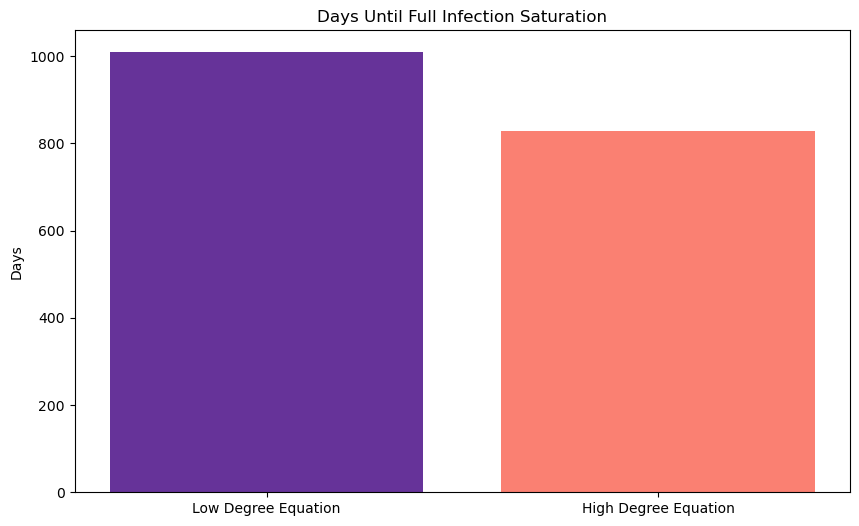

828
1009


In [ ]:
'''
Compare two simulations of disease spread:
Simulation 1) Uses a lower degree of fitting to the data
Simulation 2) Uses a high degree of fitting to the data
Determines how many days elapse before 100% disease spread
100 million population, increased spread rate for demonstration purposes
Dataset taken from Our World in Data: Covid 19 Confirmed Cases from 2020-2025 to determine rate of transmission
'''

# Imports
import random
import statistics
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Variables
total = 100000000 # 100 million
infectedDaily = [1]

# Loading and Configuring the dataset
covidData = pd.read_csv('covid19cases.csv')
usaCovidData = covidData[covidData['Entity'] == 'United States'] # Looks for the United States data
usaCovidData = usaCovidData[['Day', 'Total confirmed cases of COVID-19 per million people']] # Filters to get the date and cases of the US set
usaCovidData.columns = ['Day', 'Cases_per_Million'] # Renames the 2nd column to something easier
usaCovidData['Day'] = pd.to_datetime(usaCovidData['Day']) # Turns the String value into a pandas timestamp object
usaCovidData = usaCovidData.sort_values(by='Day').reset_index(drop=True) # Ensures that dates are properly reordered
# new column for new cases per day
usaCovidData["Cases_per_Day"] = usaCovidData["Cases_per_Million"].diff() # .diff calculates the difference in a list between index n and n-1 
usaCovidData["Cases_per_Day"] = usaCovidData['Cases_per_Day'].fillna(0) # Replaces null rows with 0, looked online and apparently this works instead of dropna


# Creating a polynomial expression to fit a curve to the data
x = np.arange(len(usaCovidData)) # Takes the length of usaCovidData (number of rows) and puts it in an evenly spaced array. Used for time
y = usaCovidData["Cases_per_Day"].values # Returns the values of that column of the usaCovidData
lowEquation = np.poly1d(np.polyfit(x,y,1)) # Creates a 1-dimensional polynomial with coefficients that match the curve best, with a degree of similarity of 5
highEquation = np.poly1d(np.polyfit(x,y,15)) # Same thing as previous equation, higher degree of similarity to data


# Creating the simulation subroutine for each day
def disease_spread(spreadEquation):
    infected = 1
    ratio = infected/total
    daysToSaturation = 0
    infectedDaily = [infected]
    while (100*ratio < 100.0):
        infectionRate = max(0, spreadEquation(daysToSaturation)/1000000) # Ensures the chance is above 0. Inputs day value for x in polynomial
        newInfected = min(total - infected, (infected*(infectionRate*80))) # Either returns the uninfected population, or new infected based on infectionRate with min()
        infected += newInfected # Adds new infected to total infected
        infectedDaily.append(infected)
        ratio = infected/total
        daysToSaturation += 1
        # print(newInfected)
    return daysToSaturation

highDays = ((disease_spread(highEquation)))
lowDays = (disease_spread(lowEquation))
plt.figure(figsize=(10, 6))
plt.bar(["Low Degree Equation", "High Degree Equation"], [lowDays, highDays], color=["rebeccapurple", "salmon"])
plt.title("Days Until Full Infection Saturation")
plt.ylabel("Days")
plt.show()
print (highDays)
print (lowDays)